In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [87]:
data=pd.read_csv('weatherAUS.csv')

In [88]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [89]:
data.shape

(145460, 23)

In [90]:
data.info

<bound method DataFrame.info of               Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0       2008-12-01   Albury     13.4  ...     21.8         No            No
1       2008-12-02   Albury      7.4  ...     24.3         No            No
2       2008-12-03   Albury     12.9  ...     23.2         No            No
3       2008-12-04   Albury      9.2  ...     26.5         No            No
4       2008-12-05   Albury     17.5  ...     29.7         No            No
...            ...      ...      ...  ...      ...        ...           ...
145455  2017-06-21    Uluru      2.8  ...     22.4         No            No
145456  2017-06-22    Uluru      3.6  ...     24.5         No            No
145457  2017-06-23    Uluru      5.4  ...     26.1         No            No
145458  2017-06-24    Uluru      7.8  ...     26.0         No            No
145459  2017-06-25    Uluru     14.9  ...     20.9         No           NaN

[145460 rows x 23 columns]>

In [91]:
missing=data.isnull().sum().sort_values(ascending=False)
missing[missing>0]


Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
RainToday         3261
Rainfall          3261
WindSpeed3pm      3062
Humidity9am       2654
WindSpeed9am      1767
Temp9am           1767
MinTemp           1485
MaxTemp           1261
dtype: int64

In [92]:
data.drop(["Date"],axis=1,inplace=True)

In [93]:
cat=data.select_dtypes(include="object")
cat.columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [94]:
num=data.select_dtypes(include=["int64","float64"])
num.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [95]:

for x in cat.columns:

 data[x]=data[x].fillna(data[x].mode()[0])

In [96]:
for x in num.columns:

 data[x]=data[x].fillna(data[x].median())

In [97]:
missing=data.isnull().sum().sort_values(ascending=False)
missing[missing>0]

Series([], dtype: int64)

In [98]:
for x in cat.columns:
  print(x)
  print("unique values are")
  print(data[x].unique())
  print("no of unique values",data[x].nunique())
  print("value counts")
  print(data[x].value_counts())
  print()

Location
unique values are
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
no of unique values 49
value counts
Canberra            3436
Sydney              3344
Brisbane            3193
Darwin              3193
Hobart              3193
Melbourne           3193
Perth               3193
Adelaide            3193
Ballarat            3040
MountGambier        3040
Albany              3040
Albury              3040
Wollongong          3040
Launceston          3040
GoldCo

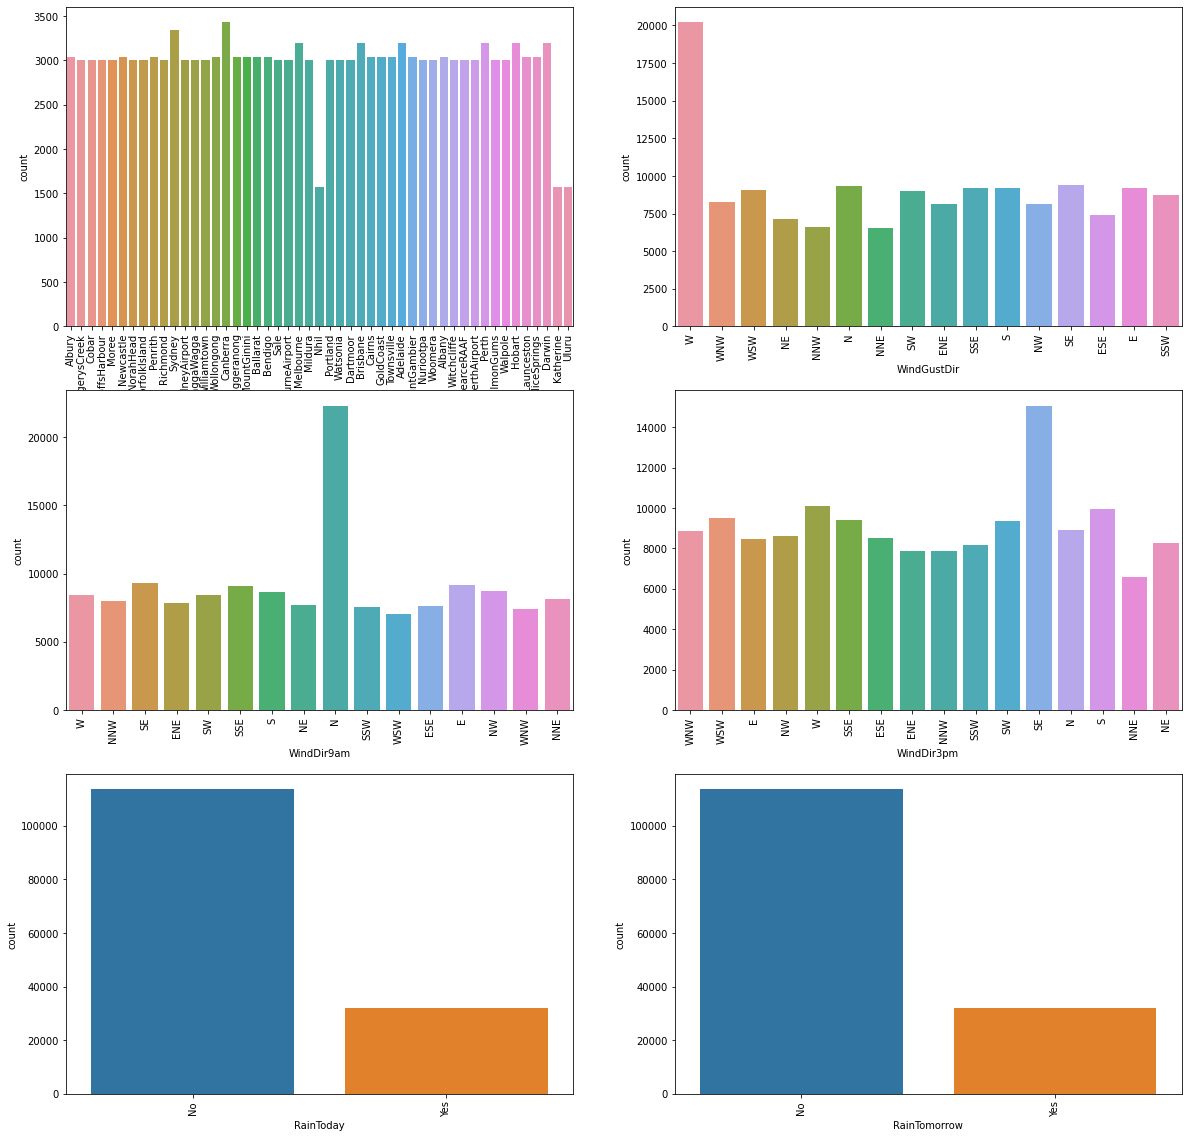

In [102]:
cat=data.select_dtypes(include="object")
L=[20,2,1]
a,b,c=L
fig=plt.figure(figsize=(20,140))
for x in cat:
  plt.subplot(a,b,c)
  sns.countplot(data[x])
  x=plt.xticks(rotation=90)
  
  c=c+1


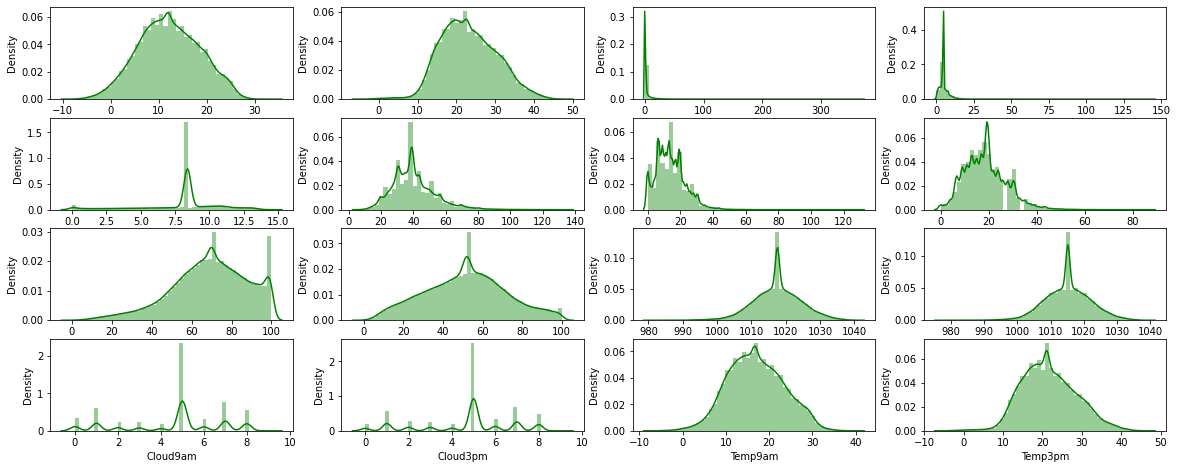

In [100]:
num=data.select_dtypes(include=["int64","float64"])
L=[10,4,1]
a,b,c=L
fig=plt.figure(figsize=(20,20))
for x in num:
  plt.subplot(a,b,c)
  sns.distplot(data[x],color="green")
  
  c=c+1

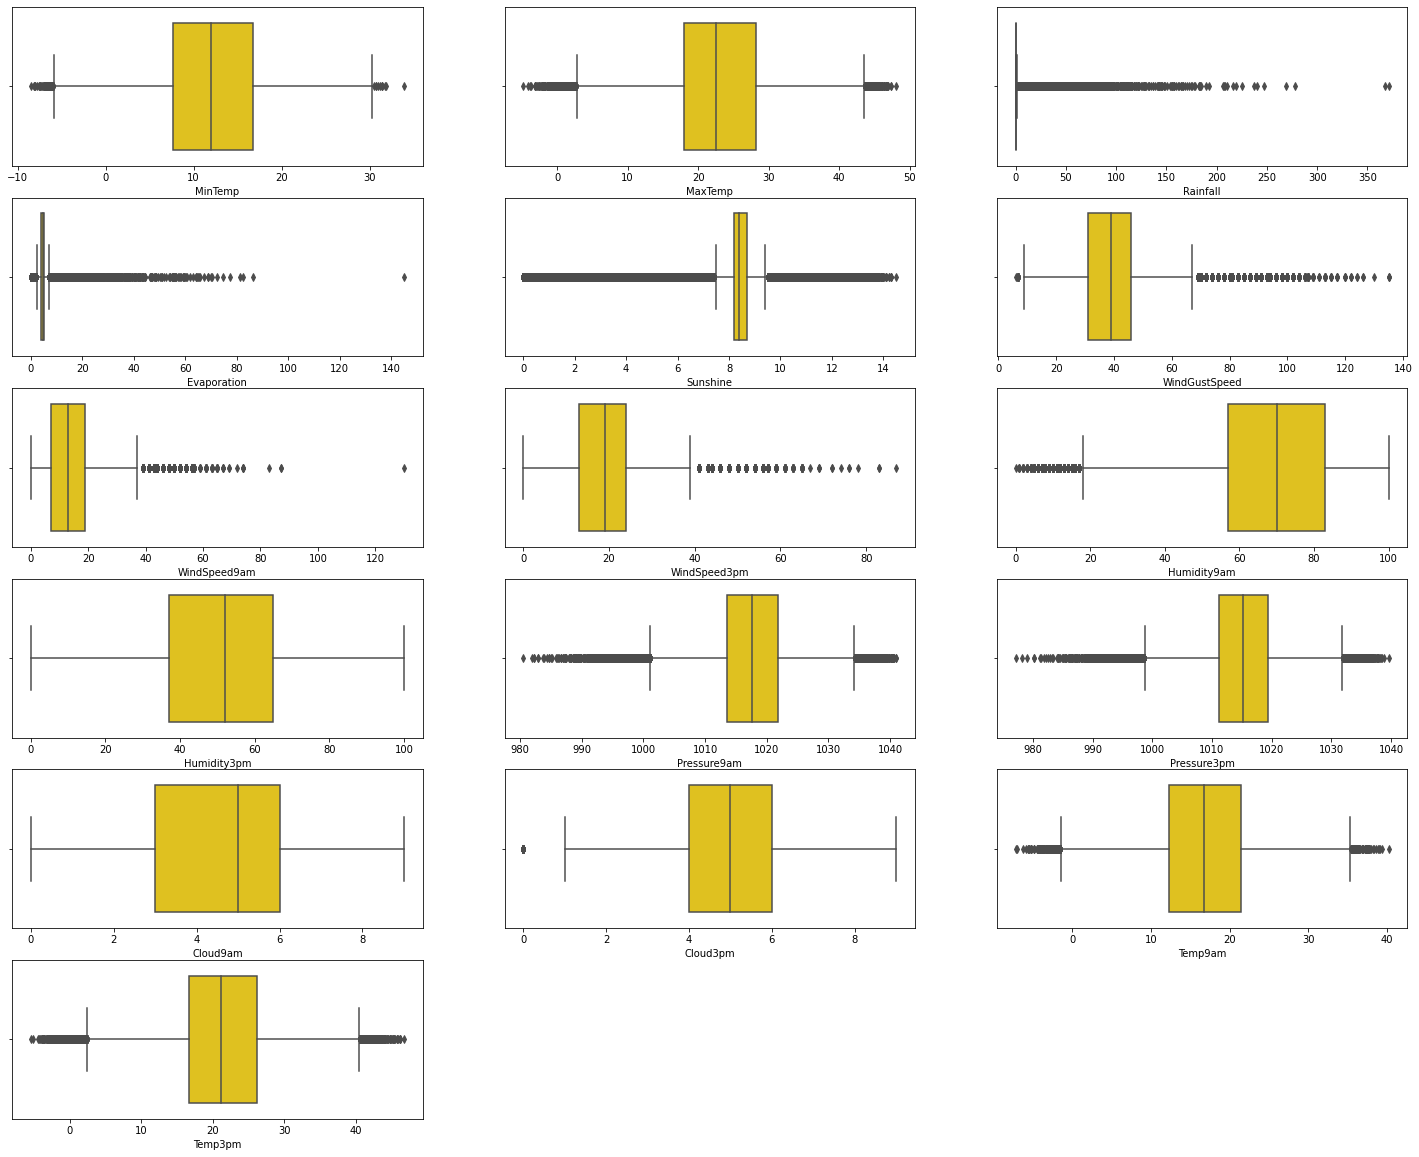

In [101]:
num=data.select_dtypes(include=["int64","float64"])
L=[13,3,1]
a,b,c=L
fig=plt.figure(figsize=(25,45))
for x in num:
  plt.subplot(a,b,c)
  sns.boxplot(data[x],color="gold")
  
  c=c+1

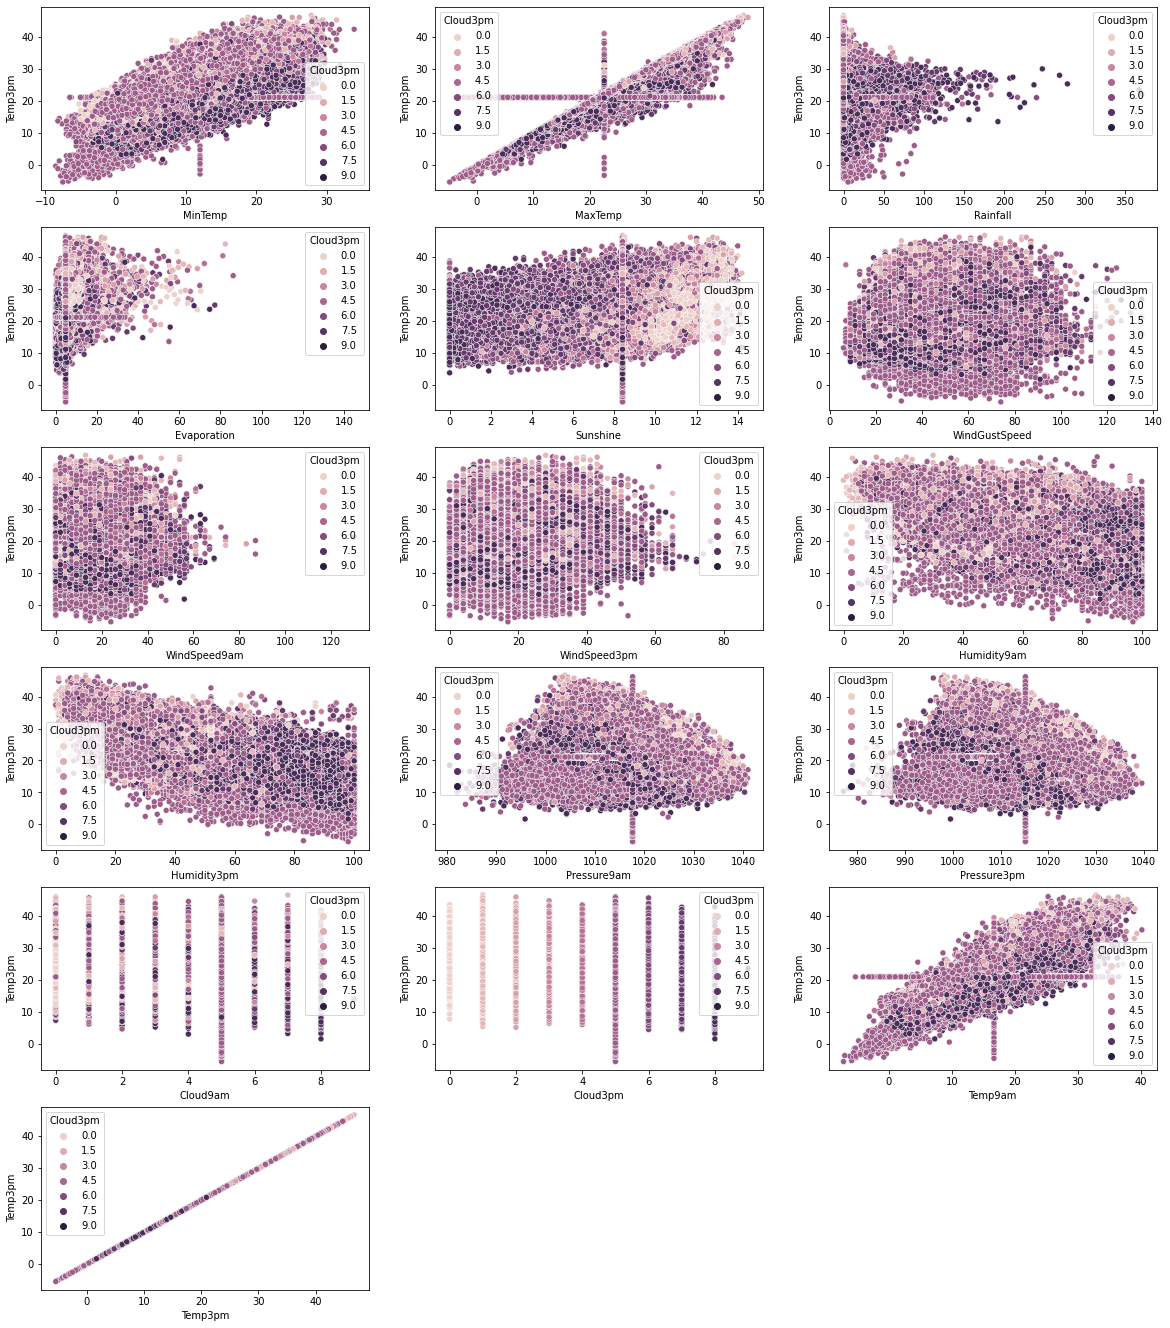

In [ ]:
num=data.select_dtypes(include=["int64","float64"])
L=[15,3,1]
a,b,c=L
fig=plt.figure(figsize=(20,60))
for x in num:
  plt.subplot(a,b,c)
  sns.scatterplot(data[x],data['Temp3pm'],hue=data["Cloud3pm"])
  
  c=c+1

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,145460.0,12.192053,6.365780,-8.5,7.7,12.0,16.8,33.9
MaxTemp,145460.0,23.215962,7.088358,-4.8,18.0,22.6,28.2,48.1
Rainfall,145460.0,2.307990,8.389771,0.0,0.0,0.0,0.6,371.0
Evaporation,145460.0,5.179779,3.178819,0.0,4.0,4.8,5.2,145.0
Sunshine,145460.0,7.989889,2.757790,0.0,8.2,8.4,8.7,14.5
WindGustSpeed,145460.0,39.962189,13.120931,6.0,31.0,39.0,46.0,135.0
WindSpeed9am,145460.0,14.030751,8.861796,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,145460.0,18.669758,8.716716,0.0,13.0,19.0,24.0,87.0
Humidity9am,145460.0,68.901251,18.855360,0.0,57.0,70.0,83.0,100.0
Humidity3pm,145460.0,51.553396,20.471345,0.0,37.0,52.0,65.0,100.0


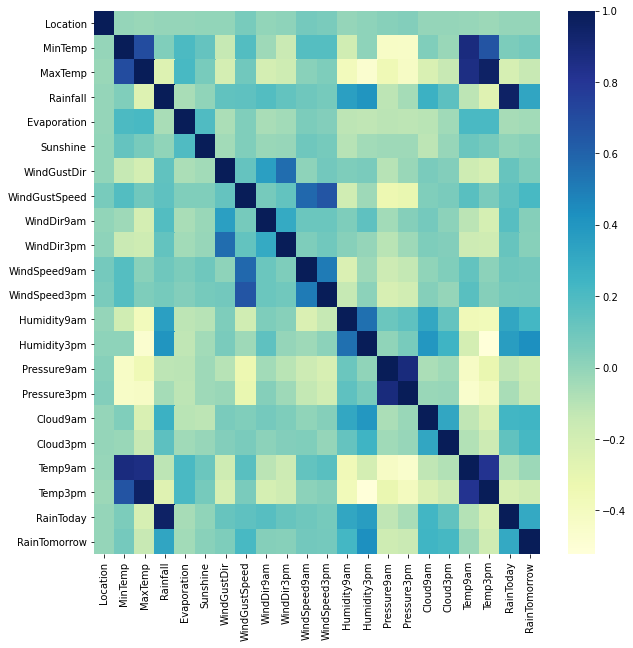

In [64]:
# plotting Heat map
corr=data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr ,cmap="YlGnBu",annot=False)

In [ ]:
for i in num:
  Q25=data[i].quantile(0.25)
  Q75=data[i].quantile(0.75)
  IQR=Q75-Q25
  min_limit=Q25-1.5*IQR
  max_limit=Q75+1.5*IQR
  outliers1=[x for x in data[i] if x < min_limit or x > max_limit]
  median=np.median(data[i])
  data[i]=data[i].replace(outliers1,max_limit)

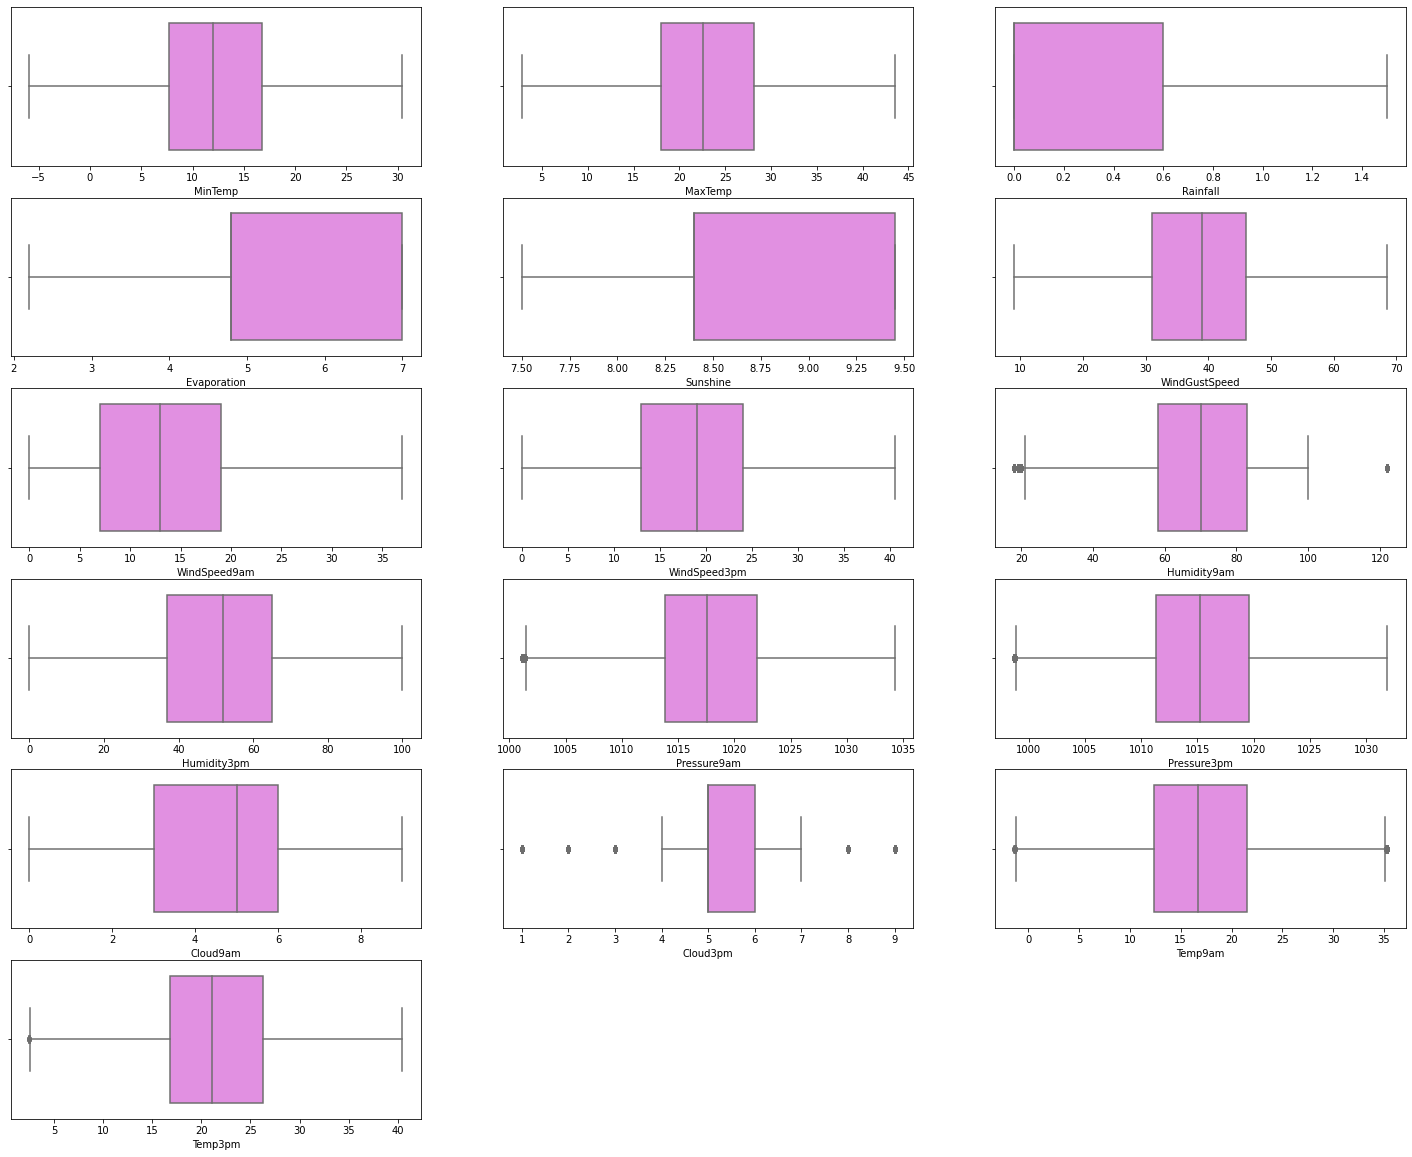

In [ ]:
num=data.select_dtypes(include=["int64","float64"])
L=[13,3,1]
a,b,c=L
fig=plt.figure(figsize=(25,45))
for x in num:
  plt.subplot(a,b,c)
  sns.boxplot(data[x],color="violet")
  
  c=c+1

In [65]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
cat_data=data.select_dtypes(include='object')
for x in cat_data:
  data[x]=label.fit_transform(data[x].astype(str))

In [66]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0.0,4.8,8.4,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
145456,41,3.6,25.3,0.0,4.8,8.4,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
145457,41,5.4,26.9,0.0,4.8,8.4,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0
145458,41,7.8,27.0,0.0,4.8,8.4,9,28.0,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [72]:
x=data.drop(['RainTomorrow'],axis=1)
y=data[['RainTomorrow']]

In [73]:
#import model to test the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_test.shape, y_test.shape,y_train.shape

((97458, 21), (48002, 21), (48002, 1), (97458, 1))

In [74]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(x_train,y_train)
xgb_predict=model_xgb.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=xgb_predict))
print(classification_report(y_test,xgb_predict))
confusion_matrix(y_test,xgb_predict)

accuracy score :
 0.8483188200491646
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     37367
           1       0.75      0.47      0.58     10635

    accuracy                           0.85     48002
   macro avg       0.81      0.71      0.74     48002
weighted avg       0.84      0.85      0.83     48002



array([[35738,  1629],
       [ 5652,  4983]])

In [75]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(x_train, y_train)
svm_predict=model_svm.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=svm_predict))
print(classification_report(y_test,svm_predict))
confusion_matrix(y_test,svm_predict)

accuracy score :
 0.8309862089079622
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     37367
           1       0.78      0.33      0.46     10635

    accuracy                           0.83     48002
   macro avg       0.81      0.65      0.68     48002
weighted avg       0.82      0.83      0.80     48002



array([[36369,   998],
       [ 7115,  3520]])

In [76]:
from sklearn.linear_model import SGDClassifier
model_sgd=SGDClassifier()
model_sgd.fit(x_train,y_train)
sgd_predict=model_sgd.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=sgd_predict))
print(classification_report(y_test,sgd_predict))
confusion_matrix(y_test,sgd_predict)

accuracy score :
 0.6342652389483772
              precision    recall  f1-score   support

           0       0.95      0.56      0.70     37367
           1       0.37      0.90      0.52     10635

    accuracy                           0.63     48002
   macro avg       0.66      0.73      0.61     48002
weighted avg       0.82      0.63      0.66     48002



array([[20908, 16459],
       [ 1097,  9538]])

In [77]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier()
model_RF.fit(x_train,y_train)
RF_predict=model_RF.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=RF_predict))
print(classification_report(y_test,RF_predict))
confusion_matrix(y_test,RF_predict)

accuracy score :
 0.8530686221407441
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     37367
           1       0.77      0.48      0.59     10635

    accuracy                           0.85     48002
   macro avg       0.82      0.72      0.75     48002
weighted avg       0.84      0.85      0.84     48002



array([[35832,  1535],
       [ 5518,  5117]])

In [78]:
import lightgbm as lgb
model_lgb=lgb.LGBMClassifier()
model_lgb.fit(x_train,y_train)
lgb_predict=model_lgb.predict(x_test)
from sklearn.metrics import accuracy_score ,confusion_matrix 
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=lgb_predict))
print(classification_report(y_test,lgb_predict))
confusion_matrix(y_test,lgb_predict)

accuracy score :
 0.8556101829090454
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     37367
           1       0.76      0.51      0.61     10635

    accuracy                           0.86     48002
   macro avg       0.81      0.73      0.76     48002
weighted avg       0.85      0.86      0.84     48002



array([[35611,  1756],
       [ 5175,  5460]])

In [79]:
from sklearn.tree import DecisionTreeClassifier
model_DT= DecisionTreeClassifier()
model_DT.fit(x_train,y_train)
DT_predict=model_DT.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=DT_predict))
print(classification_report(y_test,DT_predict))
confusion_matrix(y_test,DT_predict)


accuracy score :
 0.7804674805216449
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     37367
           1       0.50      0.52      0.51     10635

    accuracy                           0.78     48002
   macro avg       0.68      0.69      0.69     48002
weighted avg       0.78      0.78      0.78     48002



array([[31938,  5429],
       [ 5109,  5526]])

In [80]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=2, p=1,
                     weights='uniform')
model_KNN.fit(x_train,y_train)
KNN_predict=model_KNN.predict(x_test)
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix,classification_report
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=KNN_predict))
print(classification_report(y_test,KNN_predict))
confusion_matrix(y_test,KNN_predict)


accuracy score :
 0.8263197366776385
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     37367
           1       0.73      0.34      0.47     10635

    accuracy                           0.83     48002
   macro avg       0.78      0.65      0.68     48002
weighted avg       0.81      0.83      0.80     48002



array([[36034,  1333],
       [ 7004,  3631]])